In [373]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

import warnings 
warnings.filterwarnings('ignore')

In [374]:
# load data from csv file
df = pd.read_csv("cleaned_data_part_4.csv", sep=',')
df

,Comments,Type
0,វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...,0.00
1,៣៣៥៥ឆ្កែបើកឡាន,1.00
2,ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS,1.00
3,នេះជាខួររបស់តួចឹត្តអាក្រក,1.00
4,មុខពេទ្យកាល់ម៉ែត្រ,0.00
...,...,...
1732,ល្អណាស់បើមានmemeបែបហ្នឹងច្រើន ប្រហែលអាចទាញគំនិ...,NaN
1733,បងរឿងជាច្រើនដែរបងប្អូនមិនដឹង ហើយមកតាមដានព្រឹត្...,NaN
1734,ខ្ញុំគិតថាចឹងវាបែបនឹងពិតមែន គួរយល់ហើយថាមិចបានគ...,0.00
1735,បងនិយាយបានឆ្កួតល្អណាស់​ ខ្ញំុសរសើរបង​​ បងពិតជា...,1.00


In [375]:
# count missing values for each column
print("Missing Value: ", sum(df.isnull().sum()))
# count duplicatte values
print("Duplicated Value: ", df.duplicated().sum())

Missing Value:  1035
Duplicated Value:  0


In [376]:
# Remove duplicate
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates().dropna()

print("Duplicated Value: ", df.duplicated().sum())
print("Missing Values: ", df.isnull().sum().sum())

Duplicated Value:  0
Missing Values:  0


In [377]:
non_hateful = df[df['Type'] == 0]
hateful = df[df['Type'] == 1]

print(non_hateful.head(5))
print(hateful.head(5))

                                            Comments  Type
0  វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00
4                                 មុខពេទ្យកាល់ម៉ែត្រ  0.00
5  ចុះលេាកមិនសម្រាយចឹងតាំងពីដេីមមក យកVDOមួយផ្នែកម...  0.00
7  ខ្ញុំមើលរូបដូចជាមិនសូវអីទេណាស់តើអ្នកអីយាយចង់តែ...  0.00
8         អ្នកជេរគេនិងទូលរែកយកទៅ​ អាណិតតួរអង្គឯកណាស់  0.00
                                         Comments  Type
1                                  ៣៣៥៥ឆ្កែបើកឡាន  1.00
2                 ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00
3                       នេះជាខួររបស់តួចឹត្តអាក្រក  1.00
6   ញុមចង់ជេវាថាអាចុយម្រាយតែខ្លាចវាខឹងចឹងអត់ជេវិញ  1.00
10                             ប៉ះញុមវិញឡានសួរម៉ង  1.00


0.00    475
1.00    227
Name: Type, dtype: int64


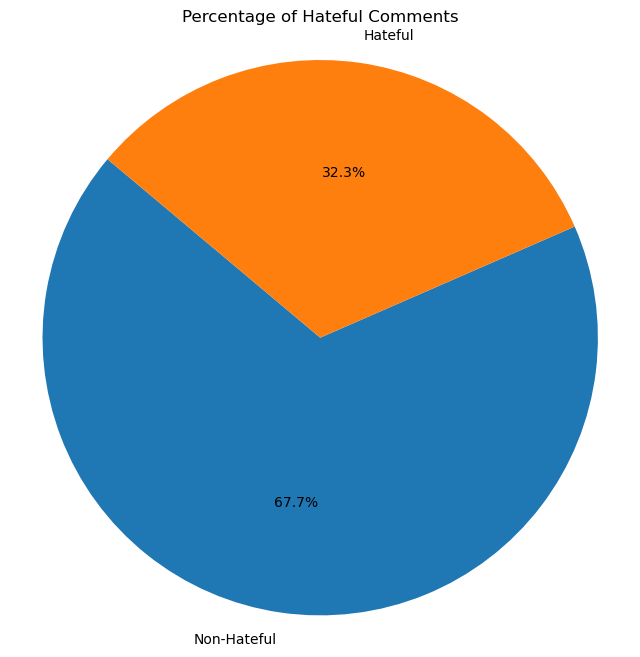

In [378]:
#write your code here 
import matplotlib.pyplot as plt
count_cmt = df["Type"].value_counts()
types = {0: 'Non-Hateful', 1: 'Hateful'}
print(count_cmt)
plt.figure(figsize=(8,8))
plt.pie(count_cmt, labels=count_cmt.index.map(types), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hateful Comments')
plt.axis('equal')
plt.show()

In [379]:
import re
# Function to clean comments
def remove_punc(cmt):
    pattern = re.compile(r'[។៕៖៘៙!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]')
    cleaned_text = pattern.sub('', cmt)
    cleaned_text = cleaned_text = re.sub(r'\s+', '', cleaned_text)
    return cleaned_text

df['Cleaned_cmt'] = df['Comments'].apply(remove_punc)

print(df)

                                               Comments  Type  \
0     វីដេអូ ពេញចឹងមកគេយល់ច្រើនហើយ អញ្ចឹងហើយគេមិនយល់...  0.00   
1                                        ៣៣៥៥ឆ្កែបើកឡាន  1.00   
2                       ឡានថោកហេីយចរិកអ្នកបេីកថោកទៀត GS  1.00   
3                             នេះជាខួររបស់តួចឹត្តអាក្រក  1.00   
4                                    មុខពេទ្យកាល់ម៉ែត្រ  0.00   
...                                                 ...   ...   
697                         ចុយម៉ាយអាយួនមកខ្មែរបានតាមណា  1.00   
698                                   គាត់វង្វេងផ្លូវទេ  0.00   
1734  ខ្ញុំគិតថាចឹងវាបែបនឹងពិតមែន គួរយល់ហើយថាមិចបានគ...  0.00   
1735  បងនិយាយបានឆ្កួតល្អណាស់​ ខ្ញំុសរសើរបង​​ បងពិតជា...  1.00   
1736                                           មិនចេះទេ  0.00   

                                            Cleaned_cmt  
0     វីដេអូពេញចឹងមកគេយល់ច្រើនហើយអញ្ចឹងហើយគេមិនយល់ច្...  
1                                        ៣៣៥៥ឆ្កែបើកឡាន  
2                        ឡានថោកហេីយចរិកអ្នកបេ

In [380]:
def load_stopword(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f if line.strip()]
    return stopwords

def remove_stopword(cmt):
        stopwords = load_stopword("Khmer_Stop_word.txt")
        cleaned_cmt = [word for word in cmt.split() if word not in stopwords]
        cleaned_cmt = ' '.join(cleaned_cmt)
        return cleaned_cmt

In [381]:
from khmernltk import sentence_tokenize
from khmernltk import word_tokenize

def tokenize(cmt):
    words = word_tokenize(cmt, return_tokens=True)
    sentence = ' '.join(word for word in words if word.strip())
    sentence = remove_stopword(sentence)
    return sentence

df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(tokenize)
print(df['Cleaned_cmt'])

# from khmernltk import sentence_tokenize
# from khmernltk import word_tokenize

# def load_suffixes(file_path):
#     with open(file_path, 'r', encoding='utf-8') as f:
#         suffixes = [line.strip() for line in f if line.strip()]
#     return suffixes

# def khmer_stemmer(word, suffixes):
#     for suffix in suffixes:
#         if word.endswith(suffix):
#             word = word[: -len(suffix)] 
#             break
#     return word

# def tokenize_and_stemming(cmt):
#     suffixes = load_suffixes("surfixes.txt")
#     tokens = word_tokenize(cmt, return_tokens=True)
#     stemmed_tokens = [khmer_stemmer(word, suffixes) for word in tokens]
#     return ' '.join(token for token in stemmed_tokens if token)

# df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(tokenize_and_stemming)
# print(df['Cleaned_cmt'])



0                             វីដេអូ ចឹង យល់ យល់ ច្រឡំ ជេ
1                                           ៣៣៥៥ ឆ្កែ ឡាន
2                      ឡាន ថោក ហេី យ ចរិក បេីក ថោក ទៀត GS
3                                  ជា ខួរ តួ ចឹត្ត អាក្រក
4                                    មុខ ពេទ្យ កាល់ម៉ែត្រ
                              ...                        
697                              ចុយ ម៉ាយ អាយួន ខ្មែរ បាន
698                                  គាត់ វង្វេង ផ្លូវ ទេ
1734    ខ្ញុំ គិត ថា ចឹង វា បែប ពិតមែន គួរ យល់ ថា មិច ...
1735    បង និយាយ បាន ឆ្កួត ខ្ញំុ សរសើរ បង បង ពិតជា ឆ្ក...
1736                                               ចេះ ទេ
Name: Cleaned_cmt, Length: 702, dtype: object


In [382]:
import json

def load_merge_map(file_path):
    # Load the merge map from the JSON file
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def merge_word(cmt):
    # Replace each phrase in the comment
    merge_map = load_merge_map("merge_map.json")
    for phrase, merged in merge_map.items():
        cmt = re.sub(rf'\b{re.escape(phrase)}\b', merged, cmt)
    return cmt


df['Cleaned_cmt'] = df['Cleaned_cmt'].apply(merge_word)

៣៣៥៥ ឆ្កែ ឡាន ឡាន ថោក ហើយ ចរិក បេីក ថោក ទៀត GS ជា ខួរ តួ ចឹត្ត អាក្រក ញុម ជេវា ថា អាចុយ ម្រាយ ខ្លាច វា ខឹង ចឹង អត់ ជេវិញ ប៉ះ ញុម វិញ ឡាន សួរ ម៉ង ឡាន មនុស្ស បេីក . ? ប៉ះ ចំ អ្នកកាន់ សិល ប៉ះ ខ្ញុំ វិញ ខ្ញុំ អោយ វា ស្ពៃ PC សុី បាយ ក្រហម កញ្ចក់ ស្ដោះ ទឹកមាត់ ដាក់ ក្បាល វា អាមុខ ឆ្កែ នាក់ និង បង ឆ្កែ ចេះ ឡាន ញុម ទេ … អា ខម អាចុយ ម្នាត៊ យ អាឆ្កួត បេីល ឡាន អត់ សាលា ជេអាឡាន 2T3355 ថា អា ឆ្កែ ខ្ញុំ ក្រែងចិត្ត 🙂‍↔️ មាន ឡាន ជិះ ថោក ទាប អា វា សន្ទះ ក្បាល ជាប់ ក្រចក់ ឡាន វា ដឺ ចឹង ខ្ញុំ មើល វីដេអូ ម្ដង ៗ ថា វីដេអូ ទេ ផ្ទះ ភ្នែក ហ្នឹង អាអញ្ចឹង ៗ ម៉ង សំណាង អត់ ប៉ះ ខ្ញុំ ប៉ះ ខ្ញុំ បុក ហ្អែង ថែម បោះ លុយ កណ្តាល មុខ បណ្តោយ ។ បើសិប ខ្ញុំ មាន ឡាន ប៉ះ ខ្ញុំ វិញ បុក ទេ ម៉ា អា ឆ្កែ សំណាង ឡាន តូច ប៉ះ ឡាន អញ វិញ ឆ្នាំ 2022 ខែ 9ឡាន 2t3355 និង ក៍ បិះ ជុំ ក្រឡង់ មេ ខ្ញុំ ដែរ គល់ ស្ពាន ផ្សារ ដី ហុយ ហេតុការ ចឹង ដែរ ខ្លាំ បាន ចឹង ទេ ឃេីញ ជុំ ក្រឡង់ រត់ លឿន ចុយ ម្រាយ មាន ឡាន ឡប់ វា ហ្នឹង ទេ មាន វា ទេព ឡប់ ហ្នឹង មើល ។ ឆ្កែ ឡាន តា បង ឡាន ថ្លៃ ចង្រៃ ឆ្កែ អ្នកបើក ការដួយ ម៉ែ អា ចុយ ម្រាយ ឡាន ម៏ អាចុយ ម្រាយ ឡាន ម្ចាស់ អន់ ឆ

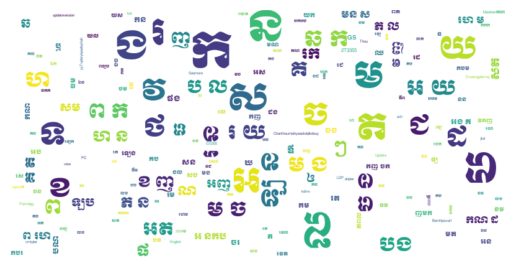

In [383]:
#write your code here
from wordcloud import WordCloud, ImageColorGenerator

neg_texts = df[df['Type'] == 1]

text = neg_texts['Cleaned_cmt'].to_string()

text = ' '.join(neg_texts['Cleaned_cmt'])

print(text)

khmer_font_path = "KhmerOS_muollight.ttf"

# Create and generate a word cloud image:
wordcloud = WordCloud(
    font_path=khmer_font_path,
    width=800,
    height=400,
    background_color="white",
    max_words=200,  # Limit the number of words to display
    max_font_size=80,  # Adjust font size for readability
    colormap="viridis"  # Choose a color palette
).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [385]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_cmt'], df['Type'], test_size=0.2, random_state=42)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\S+')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7872340425531915
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        92
         1.0       0.70      0.67      0.69        49

    accuracy                           0.79       141
   macro avg       0.77      0.76      0.76       141
weighted avg       0.79      0.79      0.79       141



In [386]:
# Predict hate speech for new Khmer text
def predict_hate_speech_khmer(cmt):
    cmt = remove_punc(cmt)
    cmt = tokenize(cmt)
    comment_vec = vectorizer.transform([cmt])
    print(cmt)
    print(comment_vec)
    prediction = model.predict(comment_vec)
    return "Hate Speech" if prediction[0] == 1 else "Non-Hate Speech"

# Test example
new_comment = "បងនិយាយបានឆ្កួតល្អណាស់​"
print(predict_hate_speech_khmer(new_comment))

បង និយាយ បាន ឆ្កួត
  (0, 372)	1
  (0, 612)	1
  (0, 628)	1
  (0, 663)	1
Non-Hate Speech
